# LPS and LCS in Tryptic Peptides

In [4]:
include("source/utils.jl")
include("source/mask.jl")
include("source/io.jl")
include("source/alignment.jl")
include("source/palindrome.jl")
include("source/trypsin.jl")
using Plots
using DataFrames
using DelimitedFiles
using StatsBase
newLPSdist() = zeros(Int, (maxlength, maxlength))
newLCSdist() = zeros(Int, (maxlength + 1, maxlength + 1))

newLCSdist (generic function with 1 method)

### Generate LPS distributions of tryptic peptides

In [ ]:
shuf_sprot = readsequences("data/shuf_sprot.fa")
sprot = readsequences("data/sprot.fa")
hardmasked_sprot = hardmask.(readsequences("data/masked_sprot.fa"))
minlength = 5
maxlength = 100;

In [ ]:
# tryptic LPS in shuf(sprot)
shuf_sprot_dist = newLPSdist()
trypticLPSdistribution!(shuf_sprot_dist, shuf_sprot, minlength, maxlength; verbose=true)
writetable("outputs/fig7_trypticLPS_shuf_sprot.dlm", shuf_sprot_dist)

In [9]:
# tryptic LPS in sprot
sprot_dist = newLPSdist()
trypticLPSdistribution!(sprot_dist, sprot, minlength, maxlength; verbose=true)
writetable("outputs/fig7_trypticLPS_sprot.dlm", sprot_dist)

λ₂ = 
(sprot) 0.05985802744978473


In [ ]:
# tryptic LPS in masked(sprot)
hardmasked_sprot_dist = newLPSdist()
trypticLPSdistribution!(hardmasked_sprot_dist, hardmasked_sprot, minlength, maxlength; verbose=true)
writetable("outputs/fig7_trypticLPS_masked_sprot.dlm", hardmasked_sprot_dist)

In [ ]:
# LCS between tryptic peptides and shuffled tryptic peptides
lcs_dist = newLCSdist()
trypticLCSdistribution!(lcs_dist, sprot, minlength, maxlength; verbose=true)
writetable("outputs/fig7_trypticLCS_sprot.dlm", lcs_dist)

In [ ]:
# LCS between random tryptic peptides within the same sequence
lcs2_dist = newLCSdist()
trypticLCS2distribution!(lcs2_dist, sprot, minlength, maxlength; verbose=true)
writetable("outputs/fig7_trypticLCS2_sprot.dlm", lcs2_dist)

## Plot

In [5]:
minlength = 5
maxlength = 100
function plot_LPS_distribution_matrix!(distribution::Matrix{Int}, label)
    global minlength, maxlength
    @assert maxlength == size(distribution)[1]
    distribution = maxlength .* distribution ./ sum(distribution)
    # calculate mean length palindrome for each sequence length
    avg_lps = [sum(collect(1:maxlength) .* distribution[seq, :]) for seq=minlength:maxlength]
    plot!(minlength:maxlength, avg_lps, label=label)
end
function plot_LCS_distribution_matrix!(distribution::Matrix{Int}, label)
    global minlength, maxlength
    @assert maxlength == size(distribution)[1] - 1
    distribution = maxlength .* distribution ./ sum(distribution)
    # calculate mean length palindrome for each sequence length
    avg_lcs = [sum(collect(1:maxlength+1) .* distribution[seq, :]) - 1 for seq=minlength:maxlength]
    plot!(minlength:maxlength, avg_lcs, label=label)
end
function plot_difference!(dist_A::Matrix{Int}, dist_B::Matrix{Int}, label)
    global minlength, maxlength
    @assert maxlength == size(dist_A)[1] == size(dist_B)[1]
    dist_A = maxlength .* dist_A ./ sum(dist_A)
    dist_B = maxlength .* dist_B ./ sum(dist_B)
    avg_pal_A =  [sum(collect(1:maxlength) .* dist_A[seq, :]) for seq=minlength:maxlength]
    avg_pal_B =  [sum(collect(1:maxlength) .* dist_B[seq, :]) for seq=minlength:maxlength]
    plot!(minlength:maxlength, avg_pal_A .- avg_pal_B, label=label)
end
trypticlpslabel(x) = latexstring(LPS(tryptic(x)))
trypticlcslabel(x, y) = latexstring(LCS(tryptic(x), tryptic(y)))
meandifflabel(x) = latexstring(diff(LPS(tryptic(x)), LPS(permute(tryptic(x)))));

In [6]:
shuf_dist = readdlm("outputs/fig7_trypticLPS_shuf_sprot.dlm", Int)
sprot_dist = readdlm("outputs/fig7_trypticLPS_sprot.dlm", Int)
hardmaskedsprot_dist = readdlm("outputs/fig7_trypticLPS_masked_sprot.dlm", Int)
lcs_dist = readdlm("outputs/fig7_trypticLCS_sprot.dlm", Int)
lcs2_dist = readdlm("outputs/fig7_trypticLCS2_sprot.dlm", Int)

101×101 Matrix{Int64}:
     0        0        0       0  …  0  0  0  0  0  0  0  0  0  0  0  0
     0        0        0       0     0  0  0  0  0  0  0  0  0  0  0  0
     0        0        0       0     0  0  0  0  0  0  0  0  0  0  0  0
     0        0        0       0     0  0  0  0  0  0  0  0  0  0  0  0
 14011  1178863  1206830  127695     0  0  0  0  0  0  0  0  0  0  0  0
  8836   993800  1285411  159135  …  0  0  0  0  0  0  0  0  0  0  0  0
  5999   901477  1426285  197069     0  0  0  0  0  0  0  0  0  0  0  0
  4181   782446  1466537  223909     0  0  0  0  0  0  0  0  0  0  0  0
  2970   679546  1482841  245777     0  0  0  0  0  0  0  0  0  0  0  0
  2105   608161  1502184  271895     0  0  0  0  0  0  0  0  0  0  0  0
  1478   551035  1544213  301409  …  0  0  0  0  0  0  0  0  0  0  0  0
  1137   494427  1531405  320038     0  0  0  0  0  0  0  0  0  0  0  0
   875   449407  1534264  342265     0  0  0  0  0  0  0  0  0  0  0  0
     ⋮                            ⋱     ⋮

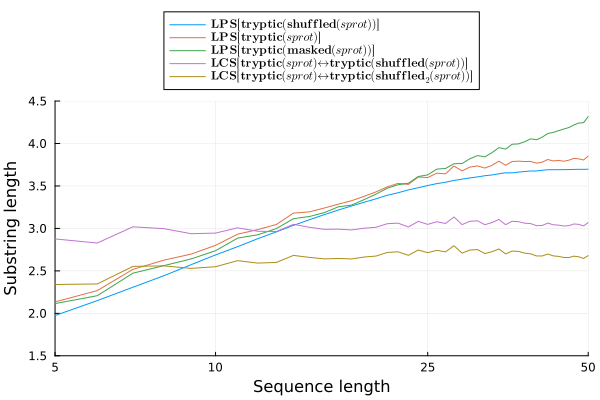

In [10]:
plot(yrange=(1.5, 4.5),
     ylabel="Substring length",
     xlabel="Sequence length",
     xrange=(5, 50),
     xticks=([5, 10, 25, 50, 100], [5, 10, 25, 50, 100]),
     xscale=:log2,
     legend=:outertop,
     dpi=500)
plot_LPS_distribution_matrix!(shuf_dist, trypticlpslabel(shuf(sprotall)))
plot_LPS_distribution_matrix!(sprot_dist, trypticlpslabel(sprotall))
plot_LPS_distribution_matrix!(hardmaskedsprot_dist, trypticlpslabel(mask(sprotall)))
plot_LCS_distribution_matrix!(lcs_dist, trypticlcslabel(sprotall, shuf(sprotall)))
plot_LCS_distribution_matrix!(lcs2_dist, trypticlcslabel(sprotall, shuf2(sprotall)))
savefig("figures/LPSLCS_TrypticPeptides.png")
plot!()